## Agenda 
1. AR Models
2. MA Models
3. ARMA Models
4. ARIMA Models

## Autoregressive Models (AR)

An autoregressive (AR) model is when a value from a time series is regressed on previous values from the same time series.

In words, the mathematical idea is the following:

$$ \text{Today = constant + slope} \times \text{yesterday + noise} $$

Or, mathematically:
$$\large Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

In [89]:
# Make Some Data
import numpy as np
import pandas as pd
np.random.seed(11)
n = 12*10
constant = 8
slope = 0.7
noise_weight = 1
noise = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(constant + slope*(data[i-1]-constant) + noise[i] if i>1 else constant + slope + noise[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

In [90]:
time_series.head()

2008-01-31    10.449455
2008-02-29     8.413927
2008-03-31     7.805184
2008-04-30     5.210310
2008-05-31     6.038932
Freq: M, dtype: float64

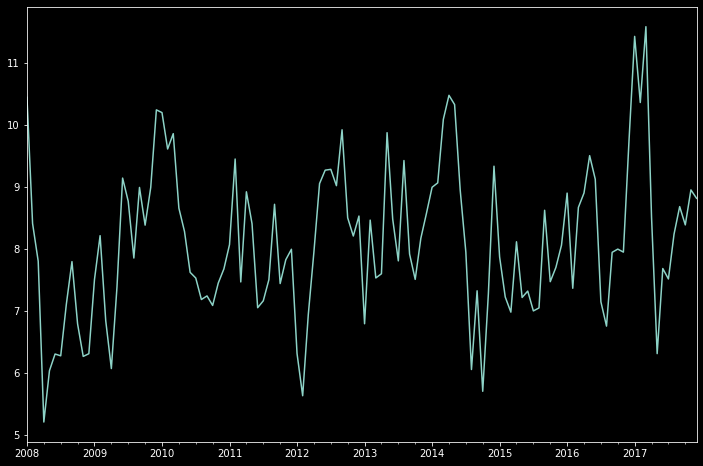

In [91]:
import matplotlib.pyplot as plt

with plt.style.context('dark_background'):
    time_series.plot(figsize = (12, 8))

In [120]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

ar_model = ARMA(time_series, order = (1, 0)).fit()
print(ar_model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(1, 0)   Log Likelihood                -167.106
Method:                       css-mle   S.D. of innovations              0.972
Date:                Thu, 10 Sep 2020   AIC                            340.213
Time:                        17:26:56   BIC                            348.575
Sample:                    01-31-2008   HQIC                           343.609
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1494      0.222     36.755      0.000       7.715       8.584
ar.L1.y        0.6042      0.074      8.199      0.000       0.460       0.749
                                    Roots           

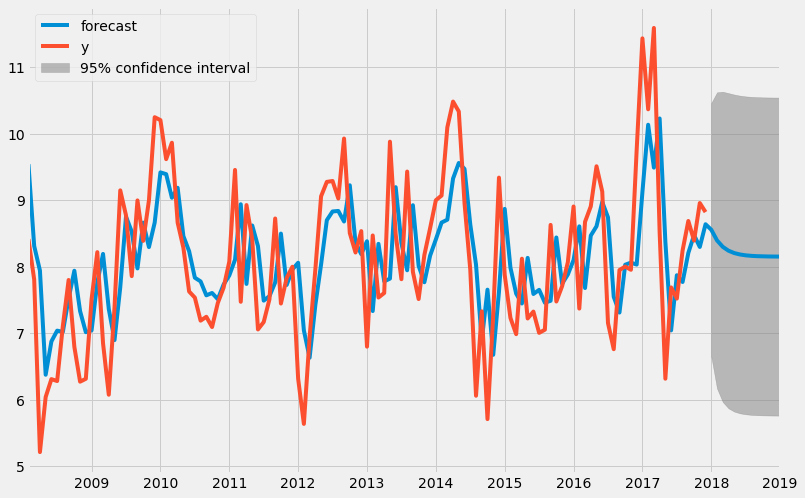

In [98]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize = (12, 8))
    ar_model.plot_predict(start = 1, end = n + 12, ax = ax);

In [111]:
ar_model.predict(1, n + 12)['2017-12-31':]

2017-12-31    8.636624
2018-01-31    8.554452
2018-02-28    8.394167
2018-03-31    8.297316
2018-04-30    8.238795
2018-05-31    8.203434
2018-06-30    8.182067
2018-07-31    8.169156
2018-08-31    8.161355
2018-09-30    8.156641
2018-10-31    8.153793
2018-11-30    8.152072
2018-12-31    8.151032
2019-01-31    8.150404
Freq: M, dtype: float64

In [112]:
time_series.tail()

2017-08-31    8.242136
2017-09-30    8.686048
2017-10-31    8.390830
2017-11-30    8.955710
2017-12-31    8.819719
Freq: M, dtype: float64

$$ \text{Today = constant + slope} \times \text{yesterday + noise} $$

In [113]:
ar_model.params

const      8.149444
ar.L1.y    0.604241
dtype: float64

In [115]:
ar_model.predict(1, n + 12)['2017-12-31']

8.636623842031916

In [117]:
ar_model.params['const'] + (ar_model.params['ar.L1.y'] * (time_series['2017-12-31'] - ar_model.params['const']))

8.554452357493465

#### AR(2)

Today = constant + slope_1 x yesterday + slope_2 x 2_days_ago + noise 

In [119]:
ar_model_12 = ARMA(time_series, order = (12, 0)).fit()
print(ar_model_12.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  120
Model:                    ARMA(12, 0)   Log Likelihood                -161.596
Method:                       css-mle   S.D. of innovations              0.926
Date:                Thu, 10 Sep 2020   AIC                            351.192
Time:                        17:26:50   BIC                            390.217
Sample:                    01-31-2008   HQIC                           367.040
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1360      0.151     53.785      0.000       7.839       8.432
ar.L1.y        0.6484      0.092      7.028      0.000       0.468       0.829
ar.L2.y       -0.0501      0.110     -0.454      0.6

In [121]:
ar_model.aic, ar_model_12.aic

(340.2128061935483, 351.19192274799724)

In [122]:
train = time_series[:-24]
test = time_series[-24:]

In [123]:
train.shape, test.shape

((96,), (24,))

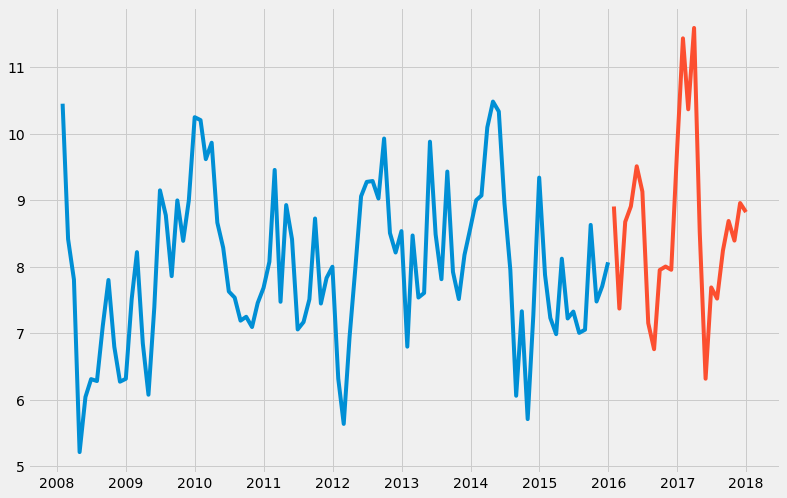

In [126]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize = (12, 8))
    plt.plot(train)
    plt.plot(test)

In [127]:
ar_model = ARMA(train, order = (1, 0)).fit()

In [131]:
forecast = ar_model.forecast(steps = 24)[0]

In [132]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test, forecast)

1.9387372313837423

In [133]:
ar_model = ARMA(train, order = (12, 0)).fit()
forecast = ar_model.forecast(steps = 24)[0]
mean_squared_error(test, forecast)

1.9143383976147128

## MA Models 

The Moving Average model can be described as the weighted sum of today's and yesterday's noise.

In words, the mathematical idea is the following:

Today = Mean + Noise + Slope×yesterday's noise
 
Or, mathematically:

$$\large 𝑌𝑡=𝜇+𝜖𝑡+𝜃∗𝜖𝑡−1$$

In [134]:
# create data 
n = 12*10
mu = 8
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + theta*errors[i-1] + errors[i] if i>1 else mu + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

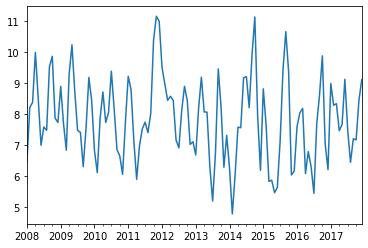

In [135]:
time_series.plot()

In [136]:
ma_model = ARMA(time_series, order = (0, 1)).fit()
ma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(0, 1)   Log Likelihood                -166.429
Method:                       css-mle   S.D. of innovations              0.961
Date:                Thu, 10 Sep 2020   AIC                            338.859
Time:                        17:35:53   BIC                            347.221
Sample:                    01-31-2008   HQIC                           342.255
                         - 12-31-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8355      0.168     46.623      0.000       7.506       8.165
ma.L1.y        0.9238      0.029     31.379      0.000       0.866       0.982
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0825           +0.0000j            1.0825            0.5000
-----------------------------------------------------------------------------
"""

In [137]:
ma_model.predict(1, n + 12)['2017-12-31':]

2017-12-31    8.893827
2018-01-31    8.039977
2018-02-28    7.835536
2018-03-31    7.835536
2018-04-30    7.835536
2018-05-31    7.835536
2018-06-30    7.835536
2018-07-31    7.835536
2018-08-31    7.835536
2018-09-30    7.835536
2018-10-31    7.835536
2018-11-30    7.835536
2018-12-31    7.835536
2019-01-31    7.835536
Freq: M, dtype: float64

In [138]:
time_series.tail()

2017-08-31    6.449893
2017-09-30    7.210200
2017-10-31    7.173073
2017-11-30    8.453920
2017-12-31    9.115125
Freq: M, dtype: float64

Today = Mean + Noise + Slope×yesterday's noise

In [139]:
ma_model.params

const      7.835536
ma.L1.y    0.923828
dtype: float64

In [141]:
error_t_minus_one = time_series['2017-12-31'] - ma_model.predict(1, n + 12)['2017-12-31']

In [142]:
ma_model.params['const'] + (ma_model.params['ma.L1.y'] * error_t_minus_one)

8.03997663662777

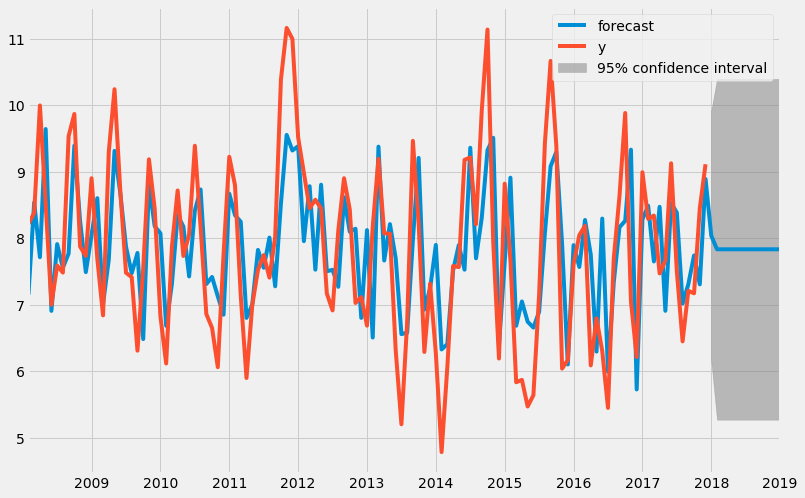

In [143]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize = (12, 8))
    ma_model.plot_predict(1, n+12, ax = ax)
    plt.show()

## ARMA

Combines both AR and MA components into one model.

$$\large𝑌𝑡 = 𝜇 + 𝜙∗𝑌𝑡−1 + 𝜃∗𝜖𝑡−1 + 𝜖𝑡$$

In [144]:
# Make data
n = 12*10
mu = 8
phi = 0.7
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + phi*(data[i-1]-mu) + errors[i] + theta*errors[i-1]  if i>1 else mu + phi + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

In [146]:
arma_model = ARMA(time_series, order = (1, 1)).fit()
print(arma_model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(1, 1)   Log Likelihood                -168.709
Method:                       css-mle   S.D. of innovations              0.975
Date:                Thu, 10 Sep 2020   AIC                            345.418
Time:                        17:43:38   BIC                            356.568
Sample:                    01-31-2008   HQIC                           349.946
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9595      0.542     14.680      0.000       6.897       9.022
ar.L1.y        0.7037      0.066     10.640      0.000       0.574       0.833
ma.L1.y        0.8460      0.056     15.021      0.0

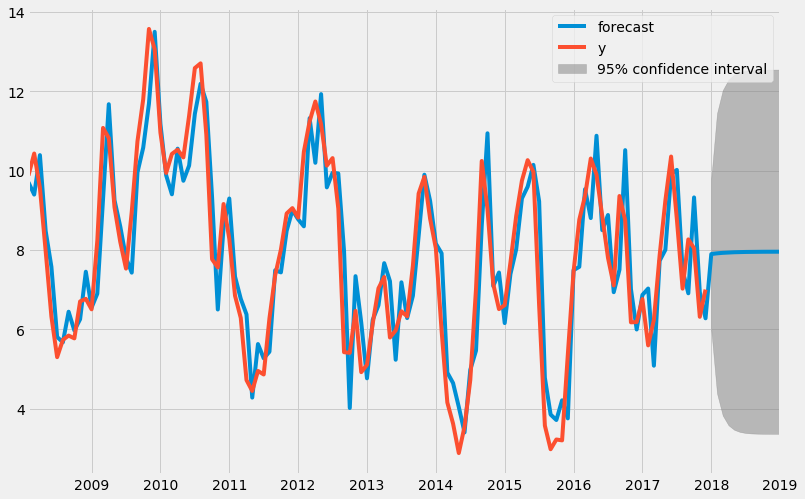

In [147]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize = (12, 8))
    arma_model.plot_predict(1, n+12, ax = ax)
    plt.show()

In [149]:
arma_model.forecast(12)

(array([7.89956341, 7.91732364, 7.92982101, 7.93861504, 7.94480315,
        7.94915755, 7.95222161, 7.9543777 , 7.95589488, 7.95696248,
        7.95771372, 7.95824234]),
 array([0.97529775, 1.79878571, 2.08968183, 2.21965264, 2.28126874,
        2.31117016, 2.32583365, 2.33306021, 2.3366302 , 2.33839587,
        2.33926965, 2.33970219]),
 array([[ 5.98801494,  9.81111188],
        [ 4.39176843, 11.44287886],
        [ 3.83411988, 12.02552213],
        [ 3.58817582, 12.28905427],
        [ 3.47359859, 12.41600771],
        [ 3.41934727, 12.47896782],
        [ 3.39367141, 12.5107718 ],
        [ 3.38166371, 12.5270917 ],
        [ 3.37618385, 12.53560591],
        [ 3.3737908 , 12.54013416],
        [ 3.37282945, 12.54259798],
        [ 3.37251032, 12.54397436]]))

## ARIMA

Combines AR and MA components as well as an <b> Integrated </b> component which accounts for trends.

AR, MA, and ARMA models require stationarity. <br>
ARIMA models can handle non-stationary time series due to the <b>I</b> component.

In [150]:
# create data
n = 12*10
mu = 8
phi = 0.7
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + phi*(data[i-1]-mu) + errors[i] + theta*errors[i-1] + 0.05*i  if i>1 else mu + phi + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

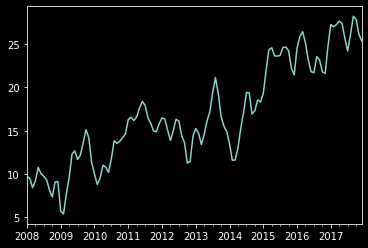

In [151]:
with plt.style.context('dark_background'):
    time_series.plot()

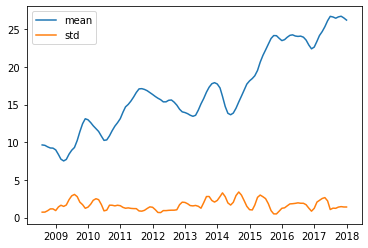

In [154]:
roll_mean = time_series.rolling(window = 7).mean()
roll_std = time_series.rolling(window = 7).std()

plt.plot(roll_mean, label = 'mean')
plt.plot(roll_std, label = 'std')
plt.legend()

In [155]:
from statsmodels.tsa.stattools import adfuller
adfuller(time_series)

(-0.5137342778492997,
 0.8893083634231667,
 8,
 111,
 {'1%': -3.490683082754047,
  '5%': -2.8879516565798817,
  '10%': -2.5808574442009578},
 320.4245441444033)

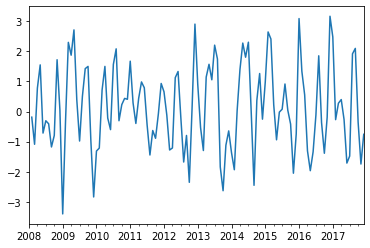

In [156]:
time_series.diff(1).plot()

In [157]:
arma_model = ARMA(time_series, order = (1, 1)).fit()
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(1, 1)   Log Likelihood                -183.270
Method:                       css-mle   S.D. of innovations              1.093
Date:                Thu, 10 Sep 2020   AIC                            374.539
Time:                        17:52:51   BIC                            385.689
Sample:                    01-31-2008   HQIC                           379.067
                         - 12-31-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0688      3.023      5.646      0.000      11.144      22.994
ar.L1.y        0.9467      0.029     32.667      0.000       0.890       1.004
ma.L1.y        0.8426      0.051     16.612      0.000       0.743       0.942
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0563           +0.0000j            1.0563            0.0000
MA.1           -1.1868           +0.0000j            1.1868            0.5000
-----------------------------------------------------------------------------
"""

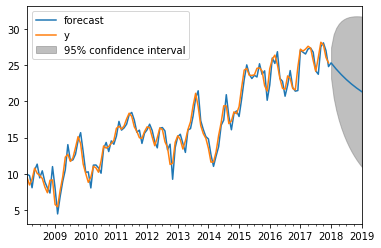

In [159]:
arma_model.plot_predict(1, n + 12);

In [160]:
from statsmodels.tsa.arima_model import ARIMA

arima_model = ARIMA(time_series, order=(1, 1, 1)).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  119
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -180.856
Method:                       css-mle   S.D. of innovations              1.101
Date:                Thu, 10 Sep 2020   AIC                            369.713
Time:                        17:54:28   BIC                            380.829
Sample:                    02-29-2008   HQIC                           374.227
                         - 12-31-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1322      0.172      0.770      0.443      -0.204       0.469
ar.L1.D.y     -0.0894      0.105     -0.850      0.397      -0.295       0.117
ma.L1.D.y      0.8605      0.051     16.989      0.000       0.761       0.960
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -11.1852           +0.0000j           11.1852            0.5000
MA.1           -1.1622           +0.0000j            1.1622            0.5000
-----------------------------------------------------------------------------
"""

In [161]:
arima_model = ARIMA(time_series, order=(0, 1, 1)).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  119
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -181.215
Method:                       css-mle   S.D. of innovations              1.104
Date:                Thu, 10 Sep 2020   AIC                            368.430
Time:                        17:54:44   BIC                            376.768
Sample:                    02-29-2008   HQIC                           371.816
                         - 12-31-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1326      0.185      0.716      0.475      -0.230       0.495
ma.L1.D.y      0.8368      0.053     15.852      0.000       0.733       0.940
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.1950           +0.0000j            1.1950            0.5000
-----------------------------------------------------------------------------
"""

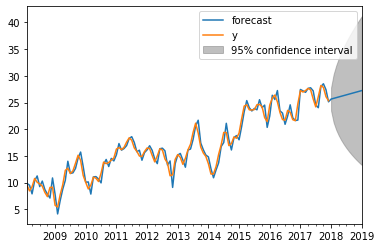

In [163]:
arima_model.plot_predict(1, n + 12);

## Finding Correct Value for ARIMA 

In [172]:
p = [0, 1, 2]
q = [0, 1, 2]

for ar in p:
    for ma in q:
        try:
            arima_model = ARIMA(time_series, order = (ar, 1, ma)).fit()
            print(f'({ar}, 1, {ma}) - AIC: {arima_model.aic}')
        except:
            continue

(0, 1, 0) - AIC: 421.12590712736636
(0, 1, 1) - AIC: 368.430487287069
(1, 1, 0) - AIC: 404.1467176254963
(1, 1, 1) - AIC: 369.71288922212284
(1, 1, 2) - AIC: 357.4697965668273
(2, 1, 0) - AIC: 372.5288681300175
(2, 1, 1) - AIC: 369.14613615871866
(2, 1, 2) - AIC: 358.9442380334676


## ACF and PACF 

Auto-correlation function (ACF)

- Measures relationship between points and various lags.

Partial auto-correlation function (PACF)

- Measures relationship between points and various lags without the influence of other lags.

| Plot | AR(p) | MA(q) | ARMA(p, q) | 
|------|-------|------|-------|
| ACF    | Tails off | Cuts off after lag q   | Tails Off  | 
| PACF    | Cuts off after lag p  | Tails off   | Tails off  | 

Look at a AR(1) time series.  The PACF should show that it tails off after lag 1 

In [83]:
# AR(1)
n = 12*10
constant = 8
slope = 0.7
noise_weight = 1
noise = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(constant + slope*(data[i-1]-constant) + noise[i] if i>1 else constant + slope + noise[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

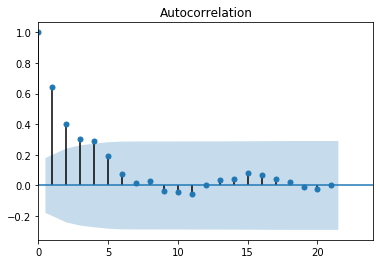

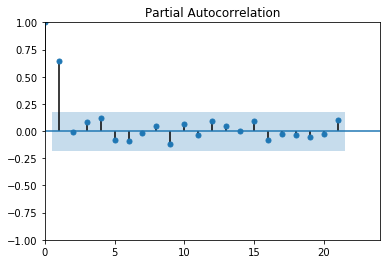

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(time_series); plt.xlim(0,24); plt.show()
plot_pacf(time_series); plt.xlim(0,24); plt.ylim(-1,1);plt.show()

Now looking at a MA(1) model.  ACF should tail off after 1 lag 

In [85]:
n = 12*10
mu = 8
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + theta*errors[i-1] + errors[i] if i>1 else mu + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

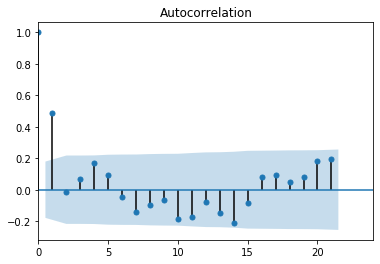

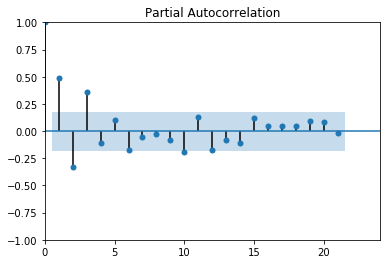

In [86]:
plot_acf(time_series); plt.xlim(0,24); plt.show()
plot_pacf(time_series); plt.xlim(0,24); plt.ylim(-1,1);plt.show()